In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import numpy as np
from src.model import FakeNewsClassifier, EnsembleClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


In [4]:
print("Loading data...")
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv').values.ravel()
y_test = pd.read_csv('../data/processed/y_test.csv').values.ravel()

Loading data...


In [5]:
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (35858, 3019)
Test set: (8965, 3019)


In [6]:
classifier = FakeNewsClassifier()
classifier.initialize_models()

Initialized 5 models:
  - Logistic Regression
  - Random Forest
  - XGBoost
  - Gradient Boosting
  - SVM


In [7]:
print("\n" + "="*80)
print("TRAINING ALL MODELS")
print("="*80)


TRAINING ALL MODELS


In [8]:
classifier.train_all_models(X_train, y_train, X_test, y_test)


Training Logistic Regression...
Logistic Regression training complete!

Evaluating Logistic Regression...
Logistic Regression Results:
  Accuracy:  0.9394
  Precision: 0.9208
  Recall:    0.9554
  F1-Score:  0.9378
  AUC:       0.9781

Training Random Forest...
Random Forest training complete!

Evaluating Random Forest...
Random Forest Results:
  Accuracy:  0.9981
  Precision: 0.9970
  Recall:    0.9991
  F1-Score:  0.9980
  AUC:       0.9999

Training XGBoost...
XGBoost training complete!

Evaluating XGBoost...
XGBoost Results:
  Accuracy:  0.9980
  Precision: 0.9974
  Recall:    0.9984
  F1-Score:  0.9979
  AUC:       1.0000

Training Gradient Boosting...
Gradient Boosting training complete!

Evaluating Gradient Boosting...
Gradient Boosting Results:
  Accuracy:  0.9974
  Precision: 0.9970
  Recall:    0.9977
  F1-Score:  0.9973
  AUC:       0.9998

Training SVM...
SVM training complete!

Evaluating SVM...
SVM Results:
  Accuracy:  0.8264
  Precision: 0.7644
  Recall:    0.9204
  F1

In [9]:
print("\n" + "="*80)
print("TRAINING COMPLETE!")
print("="*80)


TRAINING COMPLETE!


In [10]:
results_df = classifier.get_results_dataframe()
print("\n" + "="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)
print(results_df.to_string(index=False))


MODEL PERFORMANCE COMPARISON
              Model  Accuracy  Precision   Recall  F1-Score      AUC
      Random Forest  0.998104   0.996971 0.999066  0.998017 0.999865
            XGBoost  0.997992   0.997434 0.998366  0.997900 0.999956
  Gradient Boosting  0.997434   0.996967 0.997665  0.997316 0.999772
Logistic Regression  0.939431   0.920792 0.955405  0.937779 0.978056
                SVM  0.826436   0.764398 0.920383  0.835169 0.894802


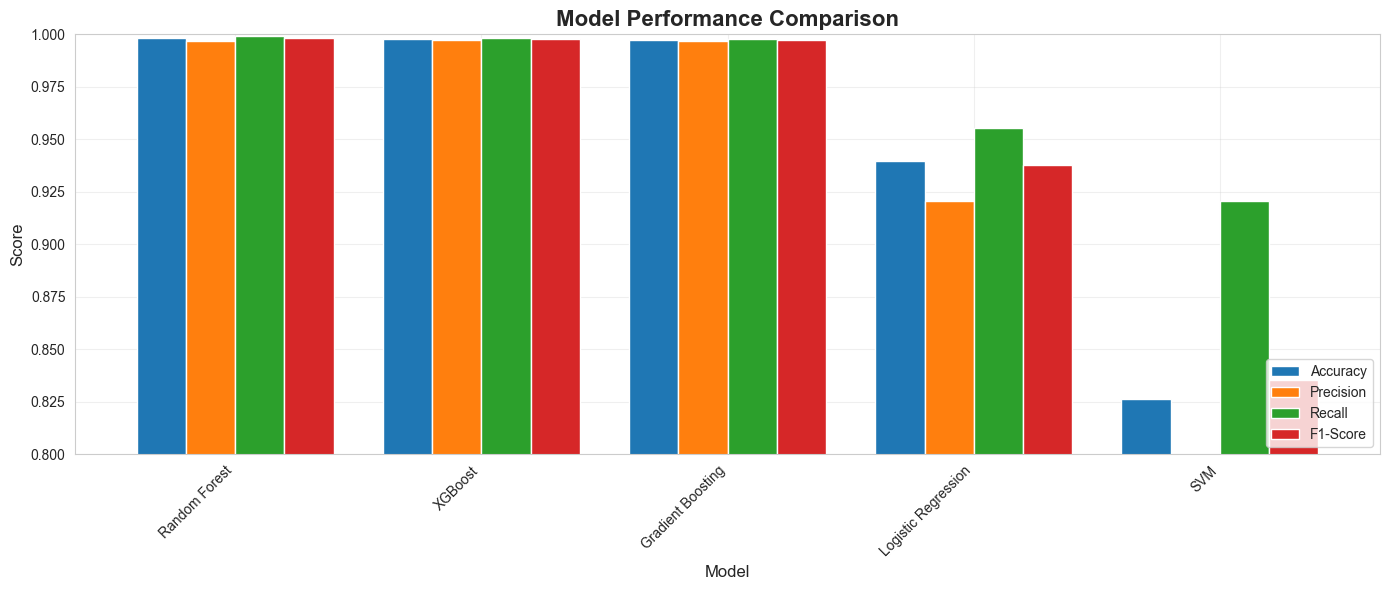

In [11]:
results_df_plot = results_df.set_index('Model')
results_df_plot[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(
    kind='bar', 
    figsize=(14, 6),
    width=0.8
)
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.ylim(0.8, 1.0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [12]:
results_df.to_csv('../models/model_results.csv', index=False)
print("\nResults saved to '../models/model_results.csv'")


Results saved to '../models/model_results.csv'



Generating confusion matrices...


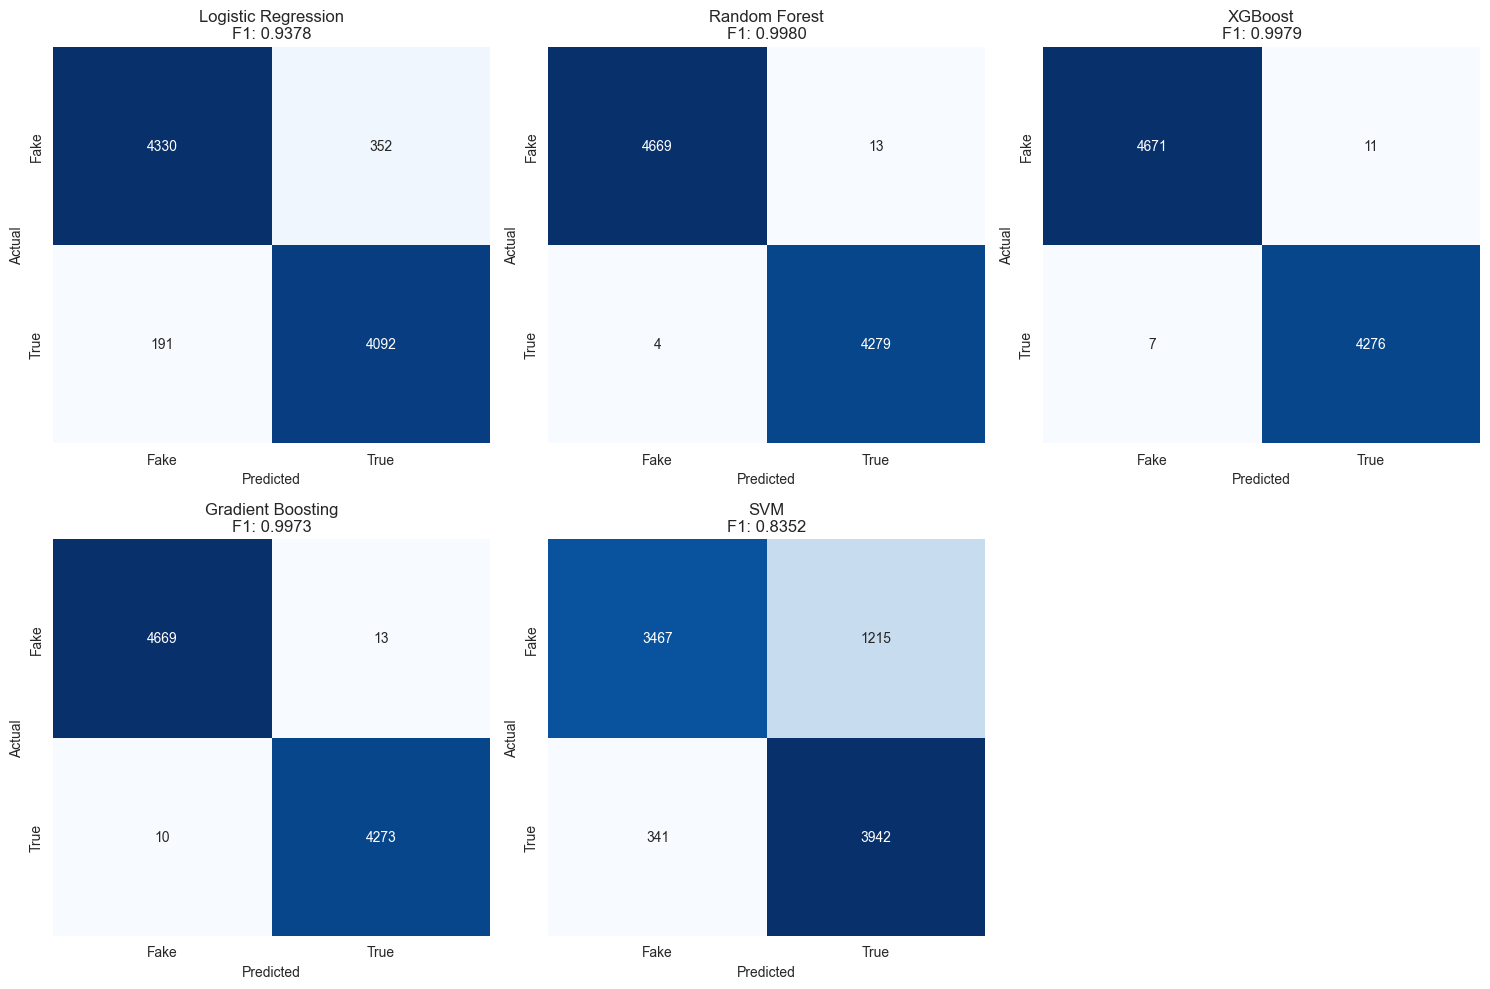

In [13]:
print("\nGenerating confusion matrices...")
classifier.plot_confusion_matrices(y_test, figsize=(15, 10))


Generating ROC curves...


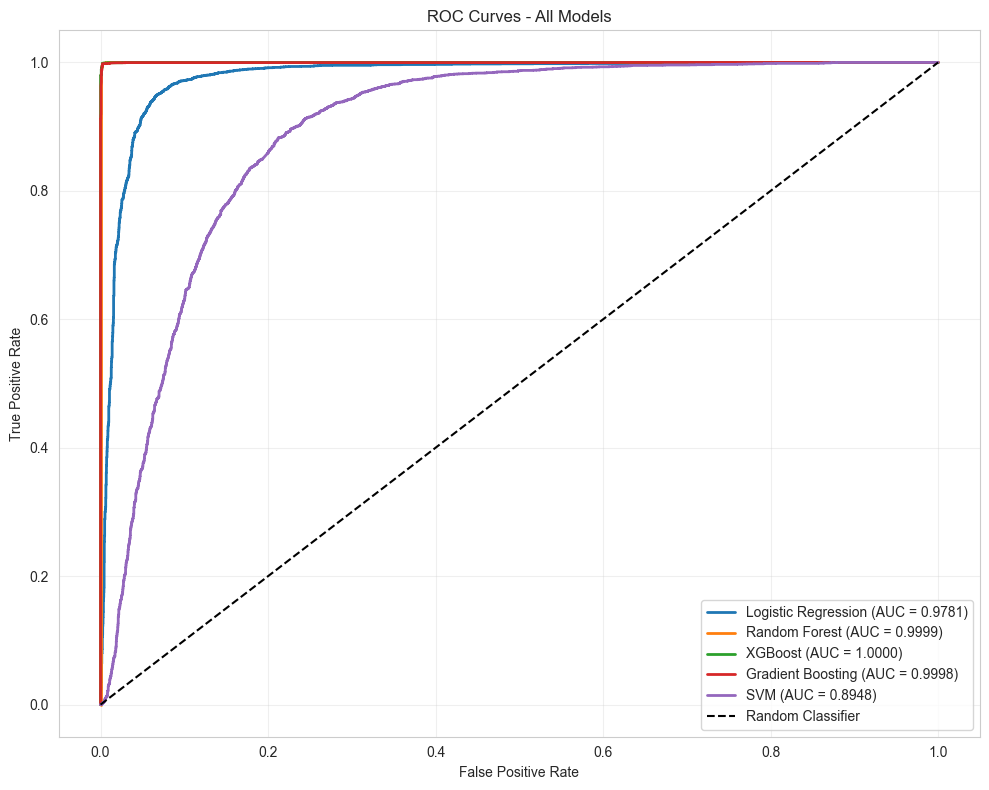

In [14]:
print("\nGenerating ROC curves...")
classifier.plot_roc_curves(y_test)

In [15]:
print("\n" + "="*80)
print("CREATING ENSEMBLE MODEL")
print("="*80)


CREATING ENSEMBLE MODEL


In [16]:
top_models = results_df.head(3)['Model'].tolist()
print(f"\nTop 3 models for ensemble: {top_models}")


Top 3 models for ensemble: ['Random Forest', 'XGBoost', 'Gradient Boosting']


In [17]:
ensemble_models = {name: classifier.trained_models[name] for name in top_models}
ensemble = EnsembleClassifier(ensemble_models)

In [18]:
print("\nEvaluating ensemble...")
ensemble_metrics = ensemble.evaluate(X_test, y_test)

print("\nEnsemble Results:")
for metric, value in ensemble_metrics.items():
    print(f"  {metric.capitalize()}: {value:.4f}")


Evaluating ensemble...

Ensemble Results:
  Accuracy: 0.9980
  Precision: 0.9974
  Recall: 0.9984
  F1_score: 0.9979
  Auc: 0.9999


In [19]:
print("\n" + "="*80)
print("ENSEMBLE vs BEST INDIVIDUAL MODEL")
print("="*80)

best_individual = results_df.iloc[0]
print(f"\nBest Individual Model: {best_individual['Model']}")
print(f"  F1-Score: {best_individual['F1-Score']:.4f}")
print(f"\nEnsemble Model:")
print(f"  F1-Score: {ensemble_metrics['f1_score']:.4f}")

improvement = ((ensemble_metrics['f1_score'] - best_individual['F1-Score']) / 
               best_individual['F1-Score']) * 100
print(f"\nImprovement: {improvement:+.2f}%")


ENSEMBLE vs BEST INDIVIDUAL MODEL

Best Individual Model: Random Forest
  F1-Score: 0.9980

Ensemble Model:
  F1-Score: 0.9979

Improvement: -0.01%


In [20]:
print("\n" + "="*80)
print("SAVING MODELS")
print("="*80)

classifier.save_models(directory='../models/')


SAVING MODELS
Saved Logistic Regression to ../models/logistic_regression.pkl
Saved Random Forest to ../models/random_forest.pkl
Saved XGBoost to ../models/xgboost.pkl
Saved Gradient Boosting to ../models/gradient_boosting.pkl
Saved SVM to ../models/svm.pkl


In [21]:
import joblib
joblib.dump(ensemble, '../models/ensemble_model.pkl')
print("Saved ensemble model to '../models/ensemble_model.pkl'")

print("\nAll models saved successfully!")

Saved ensemble model to '../models/ensemble_model.pkl'

All models saved successfully!


In [22]:
rf_model = classifier.trained_models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(20)

print("\n" + "="*80)
print("TOP 20 MOST IMPORTANT FEATURES (Random Forest)")
print("="*80)
print(feature_importance.to_string(index=False))


TOP 20 MOST IMPORTANT FEATURES (Random Forest)
              feature  importance
           tfidf_2266    0.175749
           tfidf_2322    0.057376
         title_length    0.057227
           tfidf_2852    0.044702
           tfidf_2845    0.036830
           tfidf_2898    0.033789
       question_count    0.027597
           tfidf_1269    0.023605
    exclamation_count    0.015722
      avg_word_length    0.015280
           tfidf_1270    0.013448
           tfidf_1663    0.013179
         subjectivity    0.011440
title_has_exclamation    0.010940
           tfidf_1523    0.009862
           tfidf_2001    0.009137
           tfidf_1444    0.007380
            tfidf_893    0.007343
           tfidf_2899    0.006979
            tfidf_110    0.006608


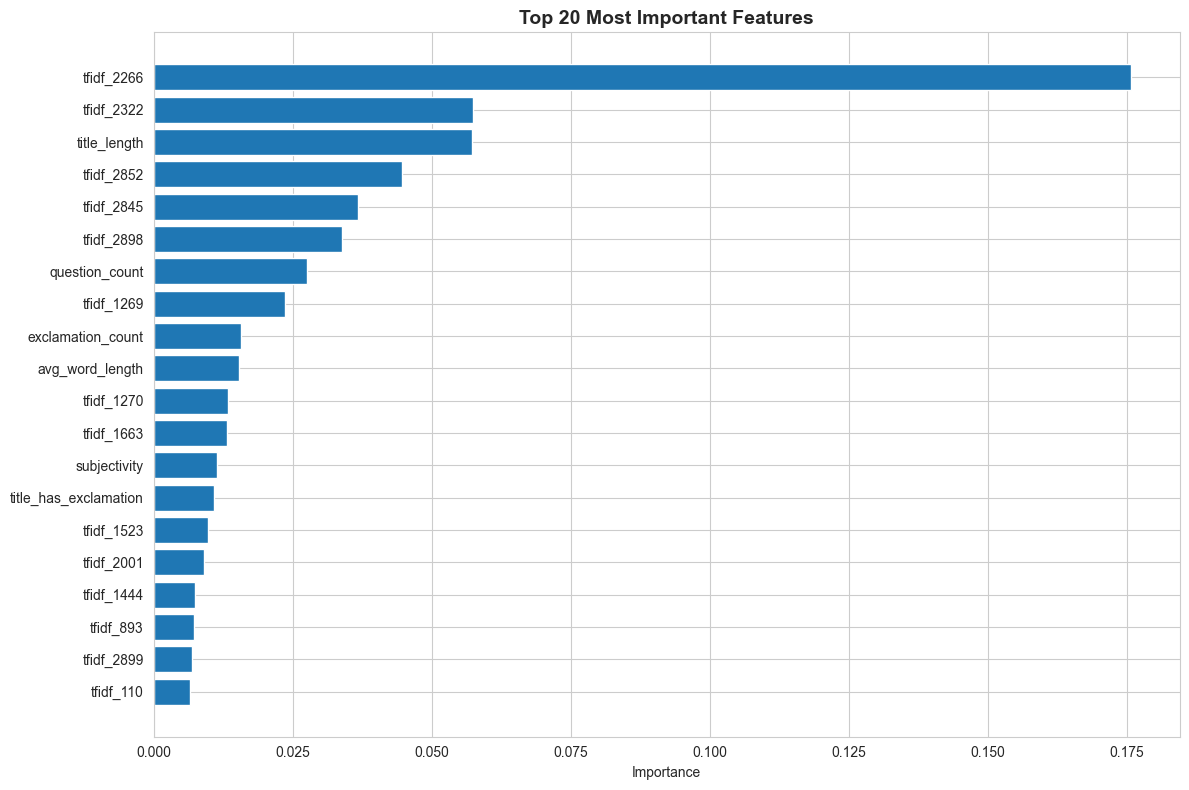

In [23]:
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_importance)), feature_importance['importance'])
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Importance')
plt.title('Top 20 Most Important Features', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [25]:
import joblib

# Save the EXACT columns the models were trained on
feature_columns = X_train.columns.tolist()
joblib.dump(feature_columns, '../models/feature_columns.pkl')

print(f"Saved {len(feature_columns)} feature columns")
print("First 10:", feature_columns[:10])
print("Last 10:", feature_columns[-10:])

Saved 3019 feature columns
First 10: ['sentiment_compound', 'sentiment_pos', 'sentiment_neu', 'sentiment_neg', 'text_length', 'word_count', 'avg_word_length', 'title_length', 'uppercase_ratio', 'title_has_exclamation']
Last 10: ['tfidf_2990', 'tfidf_2991', 'tfidf_2992', 'tfidf_2993', 'tfidf_2994', 'tfidf_2995', 'tfidf_2996', 'tfidf_2997', 'tfidf_2998', 'tfidf_2999']
